In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import itertools
from scipy import stats
import statsmodels
import sys
from matplotlib.lines import Line2D
from call_system_command import call_system_command
import pandas as pd
import os.path
%matplotlib inline

In [2]:
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
# set tick width
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 2.5
plt.rcParams['xtick.major.width'] = 1.5
#plt.rcParams['xtick.minor.size'] = 10
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

hfont00 = {'fontname':'DejaVu Sans','fontsize':24,'fontweight':'bold'}
hfont0 = {'fontname':'DejaVu Sans','fontsize':20,'fontweight':'bold'}
hfont1 = {'fontname':'DejaVu Sans','fontsize':18,'fontweight':'bold'}
hfont = {'fontname':'DejaVu Sans','fontsize':16,'fontweight':'bold'}
hfont2 = {'fontname':'DejaVu Sans','fontsize':14,'fontweight':'bold'}
%matplotlib inline

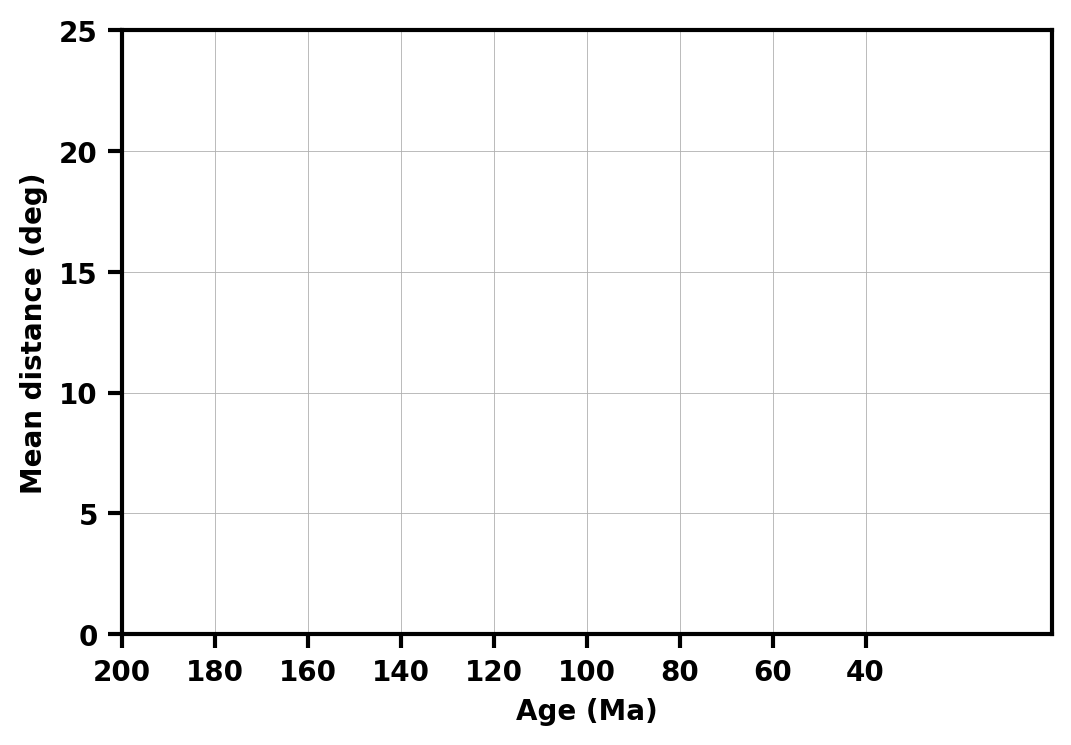

In [42]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Tomog=["SEMUCB-WM1","GypsumS","Savani","s40rts"]
Dpt=["2541km","2867km","2500km","2900km","2520km","2818km","2514km","2867km"]
Taki1="-MEAN-DISTANCES_"
meanArray=[]

Age=200
# plt.gca()
for tm in Tomog:
    plt.close()
    plt.gca().invert_xaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Mean distance (deg)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,20,-20))
    plt.gca().figure.dpi=200
    plt.ylim(0,25)
    # plt.ylim(-5,105)
    
    for d in Dpt: 
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            meanArray=[]
            stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                                 skiprows=0,header=None,sep=',')
                stdArray=np.append(stdArray,df.std()[0])
                meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
            plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue
        
    #     plt.gca().invert_yaxis()
        
        plt.legend(fontsize="x-small")
        plt.savefig("Statistics-"+tm+"-SOLID.pdf")

/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2541km-fad-200_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2867km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2867km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/Savani/Saved-Arrays/Savani-2520km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/Savani/Saved-Arrays/Savani-2818km-fad-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/s40

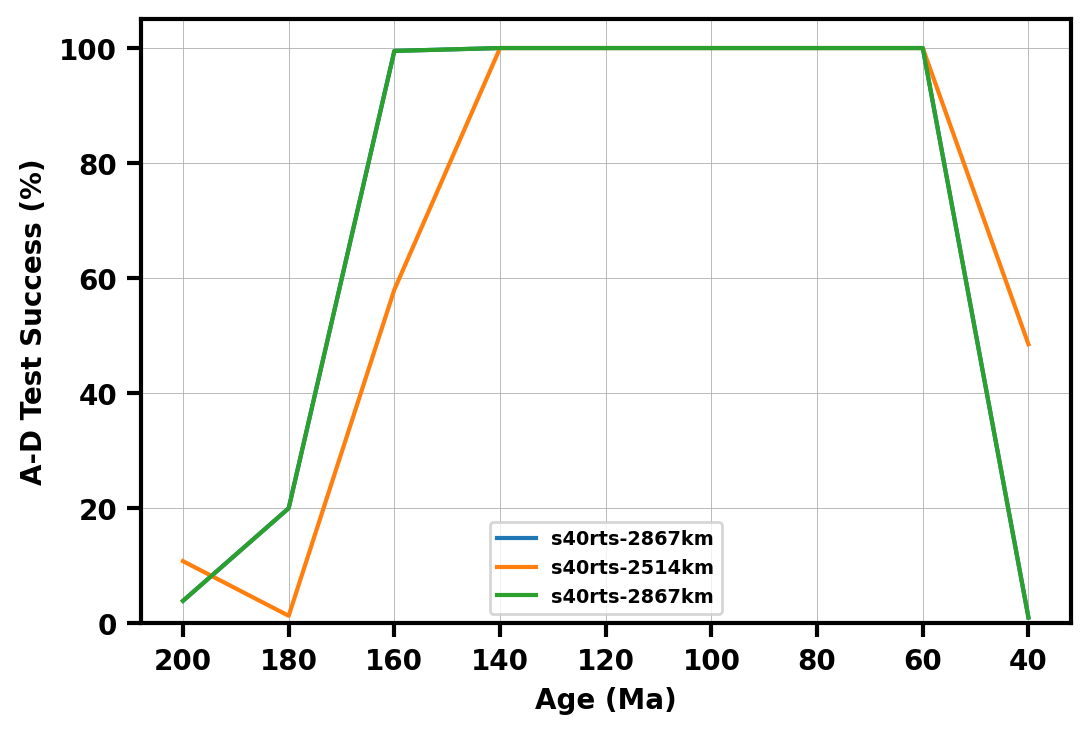

In [42]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Tomog=["SEMUCB-WM1","GypsumS","Savani","s40rts"]
Dpt=["2541km","2867km","2500km","2900km","2520km","2818km","2514km","2867km"]

PerfArray=[]

Age=200

for tm in Tomog:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('A-D Test Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,20,-20))
    plt.gca().figure.dpi=200
    plt.ylim(0,100)
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fad-"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fad-"+str(Age)+"_Ma.npy")
            PerfArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Succes=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fad-"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,Succes)

            plt.plot(np.arange(200,20,-20),100*PerfArray,label=tm+"-"+d)
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue

        
#         plt.ylim(0,25)
        # plt.ylim(-5,105)
        plt.legend(fontsize="x-small")
        plt.ylim(0,105)
    # plt.show()
        plt.savefig("Statistics-"+tm+"-ADTest.pdf")

/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2541km-fadd-200_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2867km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/SEMUCB-WM1/Saved-Arrays/SEMUCB-WM1-2867km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/Savani/Saved-Arrays/Savani-2520km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/Savani/Saved-Arrays/Savani-2818km-fadd-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-St

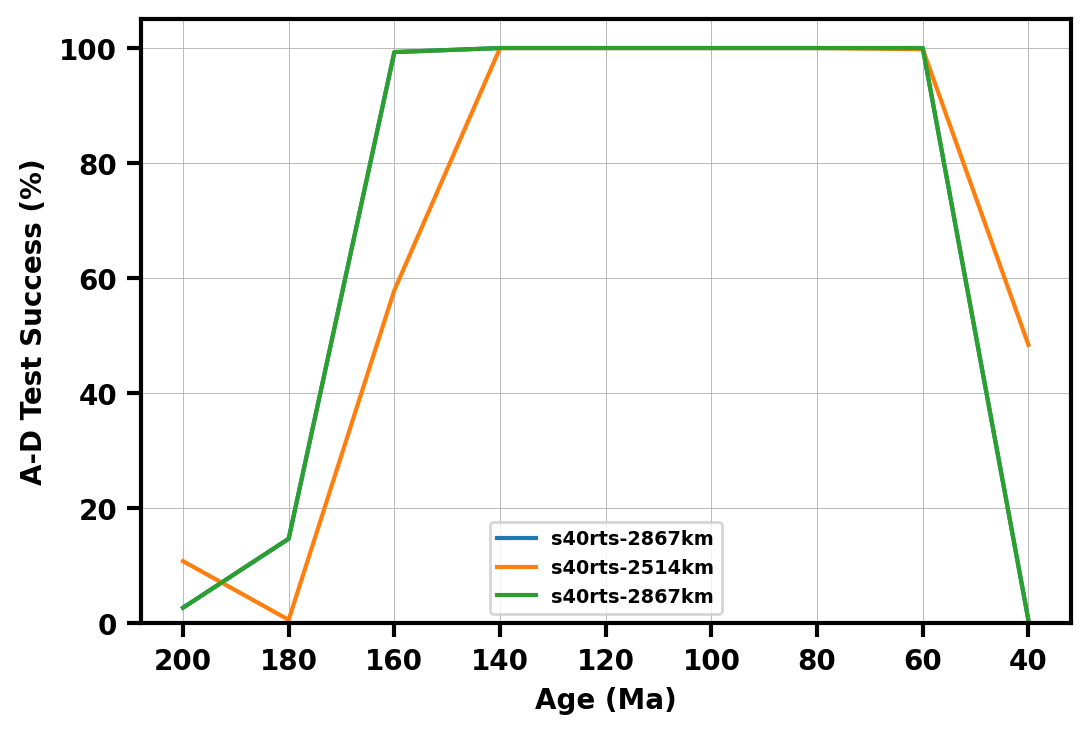

In [43]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Tomog=["SEMUCB-WM1","GypsumS","Savani","s40rts"]
Dpt=["2541km","2867km","2500km","2900km","2520km","2818km","2514km","2867km"]

PerfArray=[]

Age=200

for tm in Tomog:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('A-D Test Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,20,-20))
    plt.gca().figure.dpi=200
    plt.ylim(0,105)
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            PerfArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Succes=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,Succes)

            plt.plot(np.arange(200,20,-20),100*PerfArray,label=tm+"-"+d)
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue

        
#         plt.ylim(0,25)
        # plt.ylim(-5,105)
        plt.legend(fontsize="x-small")
    # plt.show()
        plt.savefig("Statistics-"+tm+"-AD-DTest.pdf")

# Flow Model Results Mean Distance

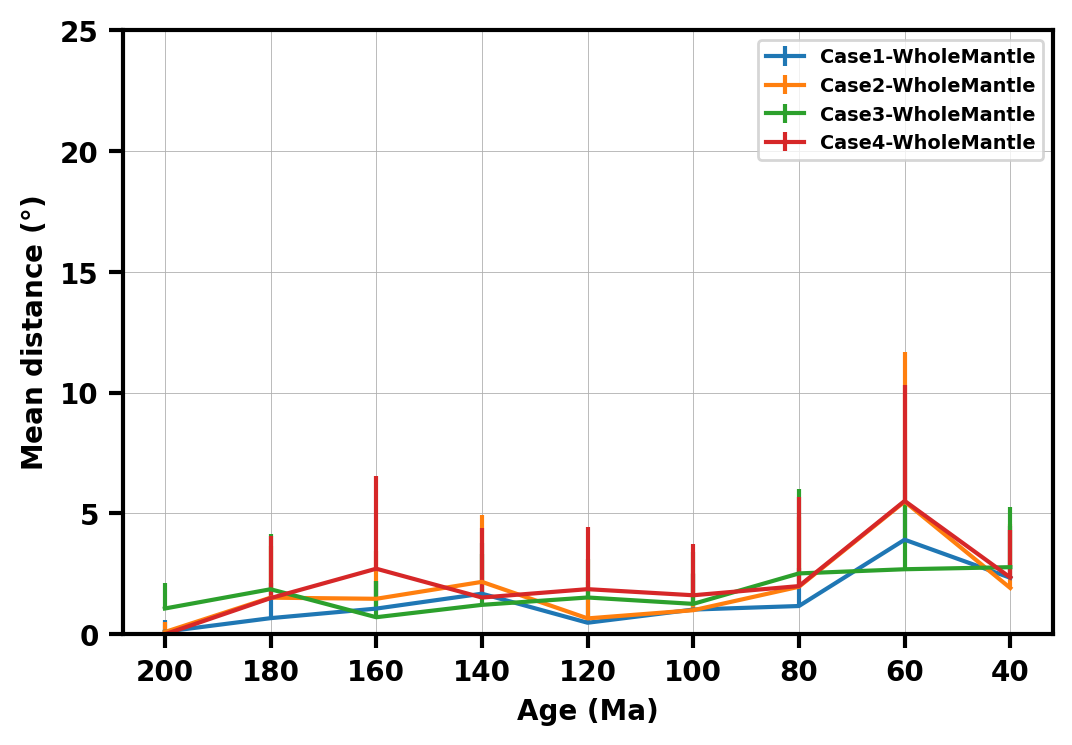

In [38]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1","Case2","Case3","Case4"]
# Dpt=["UpperMantle","LowerMantle","WholeMantle"]
Dpt=["WholeMantle"]


Taki1="-MIN-DISTANCES_"
meanArray=[]

Age=200
# plt.gca()
plt.close()
plt.gca().invert_xaxis()
plt.xlabel('Age (Ma)')
plt.ylabel('Mean distance ($\degree$)')
plt.grid(linewidth=0.3)
plt.xticks(np.arange(200,20,-20))
plt.gca().figure.dpi=200
plt.ylim(0,25)

for tm in Cases:
    
    # plt.ylim(-5,105)
    
    for d in Dpt: 
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            meanArray=[]
            stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                                 skiprows=0,header=None,sep=',')
                stdArray=np.append(stdArray,df.std()[0])
                meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
            ErLow=np.zeros(len(stdArray))
            ErLowS=np.stack([ErLow,stdArray])
            plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
        else:
            continue
        
    #     plt.gca().invert_yaxis()
        
plt.legend(fontsize="x-small")
#         plt.show()
plt.savefig("Min-Distances-Cases1-2-3-4-Whole-Mantle.pdf")
#     print("Statistics-"+tm+d+"-Cases1-2-3-4.pdf")

# Case 1 Vs. Tomos - Shallow

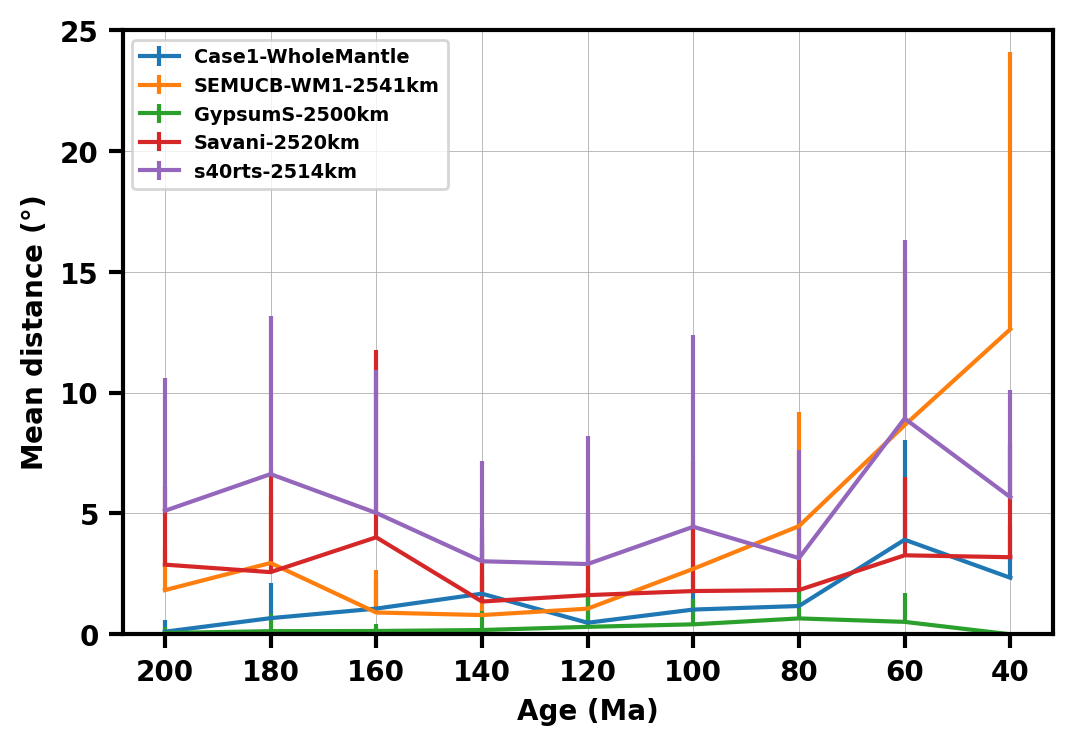

In [36]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1"]
# Dpt=["UpperMantle","LowerMantle","WholeMantle"]
Dpt=["WholeMantle"]


Taki1="-MIN-DISTANCES_"
meanArray=[]

Age=200
# plt.gca()
plt.close()
plt.gca().invert_xaxis()
plt.xlabel('Age (Ma)')
plt.ylabel('Mean distance ($\degree$)')
plt.grid(linewidth=0.3)
plt.xticks(np.arange(200,20,-20))
plt.gca().figure.dpi=200
plt.ylim(0,25)

# for tm in Cases:
tm="Case1"    
    # plt.ylim(-5,105)
    
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
    else:
        continue

#     plt.gca().invert_yaxis()


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
tm="SEMUCB-WM1"
# Dpt=["2541km","2867km"]
Dpt=["2541km"]


Taki1="-MIN-DISTANCES_"
meanArray=[]

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
    else:
        continue



tm="GypsumS"
# Dpt=["2500km","2900km"]
Dpt=["2500km"]


Taki1="-MIN-DISTANCES_"
# print()
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
    else:
        continue







tm="Savani"
# Dpt=["2520km","2818km"]
Dpt=["2520km"]


Taki1="-MIN-DISTANCES_"
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
    else:
        continue





tm="s40rts"
# Dpt=["2514km","2867km"]
Dpt=["2514km"]


Taki1="-MIN-DISTANCES_"

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d)
    else:
        continue



plt.legend(fontsize="x-small",loc="upper left")
#         plt.show()
axes=plt.gca()
axes.set_aspect(0.3636)
plt.yticks([0,25,50,75,100])
plt.savefig("Min-Distances-Case1-Vs-Tomos-Shallow.pdf")
    
    
    
#     print("Statistics-"+tm+d+"-Cases1-2-3-4.pdf")

# Case 1 VS Tomos - Deep

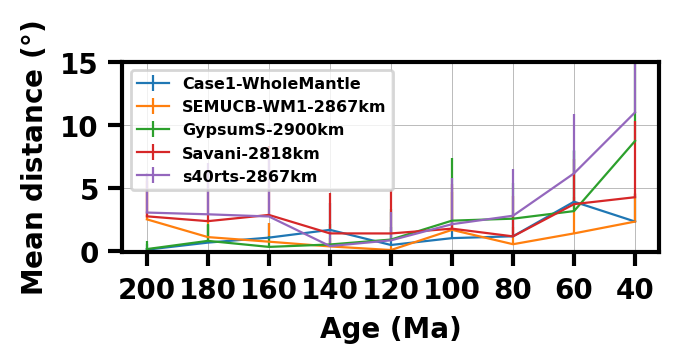

In [66]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1"]
# Dpt=["UpperMantle","LowerMantle","WholeMantle"]
Dpt=["WholeMantle"]

Taki1="-MIN-DISTANCES_"
meanArray=[]
LineWidth=0.8
Age=200
# plt.gca()
plt.close()
cm = 1/2.54
plt.figure(figsize=(8.8*cm, 3.2*cm))
plt.gca().invert_xaxis()
plt.xlabel('Age (Ma)')
plt.ylabel('Mean distance ($\degree$)')
plt.grid(linewidth=0.3)
plt.xticks(np.arange(200,20,-20))
plt.gca().figure.dpi=200
plt.ylim(0,25)

# for tm in Cases:
tm="Case1"    
    # plt.ylim(-5,105)
    
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue

#     plt.gca().invert_yaxis()


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
tm="SEMUCB-WM1"
# Dpt=["2541km","2867km"]
Dpt=["2867km"]


Taki1="-MIN-DISTANCES_"
meanArray=[]

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue



tm="GypsumS"
# Dpt=["2500km","2900km"]
Dpt=["2900km"]


Taki1="-MIN-DISTANCES_"
# print()
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue







tm="Savani"
# Dpt=["2520km","2818km"]
Dpt=["2818km"]


Taki1="-MIN-DISTANCES_"
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue





tm="s40rts"
# Dpt=["2514km","2867km"]
Dpt=["2867km"]


Taki1="-MIN-DISTANCES_"

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue



plt.legend(fontsize="xx-small",loc="upper left")
#         plt.show()
# axes=plt.gca()
# axes.set_aspect(0.3636)
# plt.figure
plt.ylim([-0.1,15])
plt.yticks([0,5,10,15])

plt.savefig("Min-Distances-Case1-Vs-Tomos-Deep.pdf")
    
    
    
#     print("Statistics-"+tm+d+"-Cases1-2-3-4.pdf")

# Case1 Vs Tomos -AreaVaried 

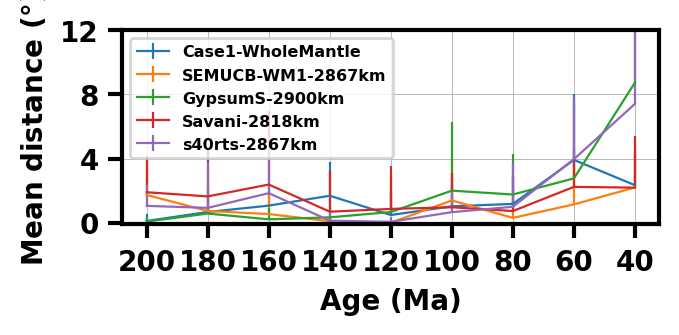

In [8]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1"]
# Dpt=["UpperMantle","LowerMantle","WholeMantle"]
Dpt=["WholeMantle"]

Taki1="-MIN-DISTANCES_"
meanArray=[]
LineWidth=0.8
Age=200
# plt.gca()
plt.close()
cm = 1/2.54
plt.figure(figsize=(8.8*cm, 3.2*cm))
plt.gca().invert_xaxis()
plt.xlabel('Age (Ma)')
plt.ylabel('Mean distance ($\degree$)')
plt.grid(linewidth=0.3)
plt.xticks(np.arange(200,20,-20))
plt.gca().figure.dpi=200
plt.ylim(0,25)

# for tm in Cases:
tm="Case1"    
    # plt.ylim(-5,105)
    
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue

#     plt.gca().invert_yaxis()


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
tm="SEMUCB-WM1"
# Dpt=["2541km","2867km"]
Dpt=["2867km"]


Taki1="-MIN-DISTANCES_"
meanArray=[]

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue



tm="GypsumS"
# Dpt=["2500km","2900km"]
Dpt=["2900km"]


Taki1="-MIN-DISTANCES_"
# print()
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue







tm="Savani"
# Dpt=["2520km","2818km"]
Dpt=["2818km"]


Taki1="-MIN-DISTANCES_"
for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue





tm="s40rts"
# Dpt=["2514km","2867km"]
Dpt=["2867km"]


Taki1="-MIN-DISTANCES_"

for d in Dpt: 
    if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        meanArray=[]
        stdArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
        for Age in np.arange(200,20,-20):
            df = pd.read_csv(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma_AreaVaried.txt",
                             skiprows=0,header=None,sep=',')
            stdArray=np.append(stdArray,df.std()[0])
            meanArray=np.append(meanArray,df.mean()[0])

#             plt.plot(np.arange(200,20,-20),meanArray,label=tm+"-"+d)
        ErLow=np.zeros(len(stdArray))
        ErLowS=np.stack([ErLow,stdArray])
        plt.errorbar(np.arange(200,20,-20),meanArray, yerr=ErLowS,label=tm+"-"+d,linewidth=LineWidth)
    else:
        continue



plt.legend(fontsize="xx-small",loc="upper left")
#         plt.show()
# axes=plt.gca()
# axes.set_aspect(0.3636)
# plt.figure
plt.ylim([-0.1,12])
plt.yticks([0,4,8,12])

plt.savefig("Min-Distances-Case1-Vs-Tomos-Deep_AreaVaried.pdf")
# plt.show()
    
    
#     print("Statistics-"+tm+d+"-Cases1-2-3-4.pdf")

# Stat. Sig. Case 1 Vs Shallow

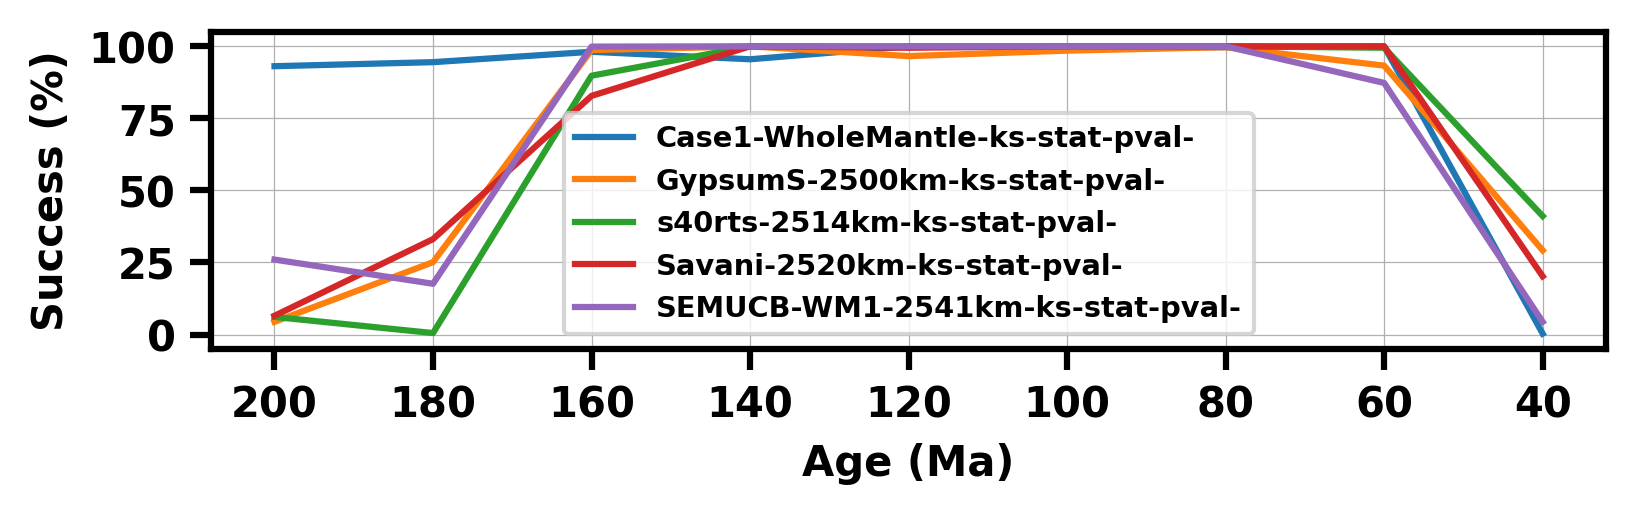

In [46]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1",]
Dpt=["WholeMantle"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]

#
PerfArray=[]
Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')

        
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["GypsumS/2500km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#             


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["s40rts/2514km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#           Savani/2520km  
    
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["Savani/2520km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

# SEMUCB-WM1/2541km

BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["SEMUCB-WM1/2541km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')


plt.legend(fontsize="x-small")
#     plt.show()
axes=plt.gca()
axes.set_aspect(0.3636)
plt.yticks([0,25,50,75,100])
plt.savefig("KS-Stats-Case1-Vs-Tomos-Shallow.pdf")        
        
        
        #width 88 mm, height 32 mm

# Case 1 VS Tomos - Deep (KS Stats)

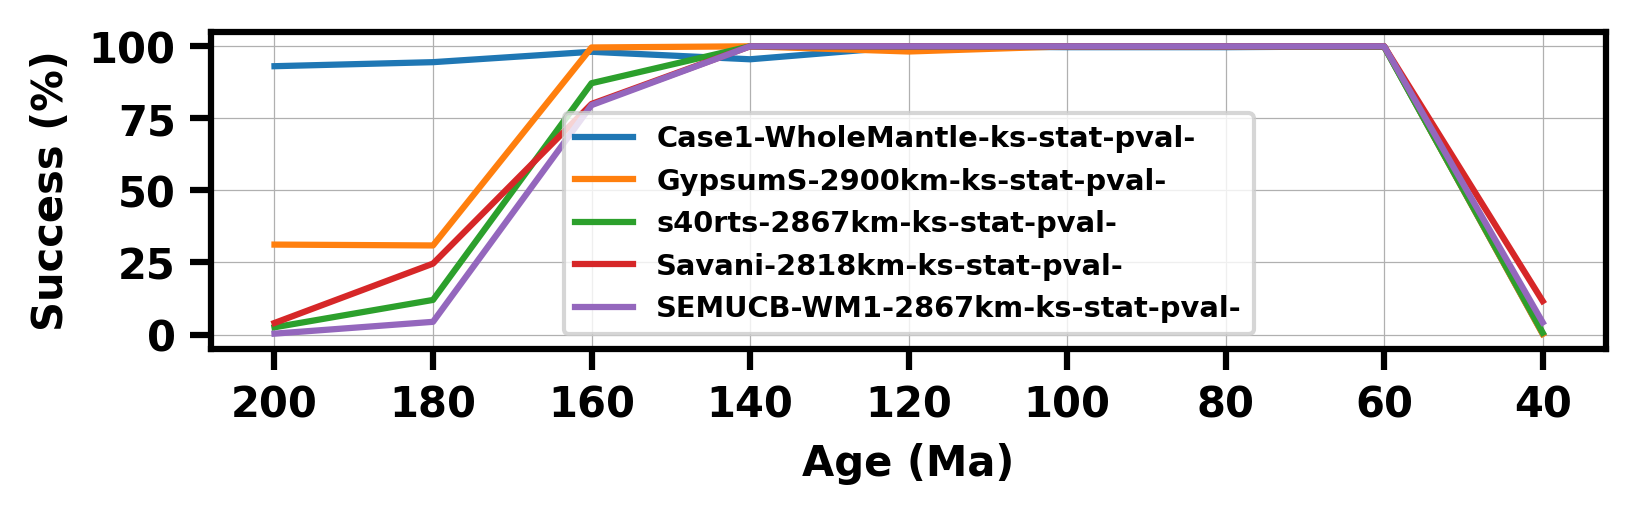

In [47]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1",]
Dpt=["WholeMantle"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]

#
PerfArray=[]
Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')

        
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["GypsumS/2900km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#             


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["s40rts/2867km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#           Savani/2520km  
    
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["Savani/2818km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

# SEMUCB-WM1/2541km

BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["SEMUCB-WM1/2867km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')


plt.legend(fontsize="x-small")
#     plt.show()
axes=plt.gca()
axes.set_aspect(0.3636)
plt.yticks([0,25,50,75,100])
plt.savefig("KS-Stats-Case1-Vs-Tomos-Deep.pdf")        
        
        
        

# Case1 VS Deep Tomo but Equal Area

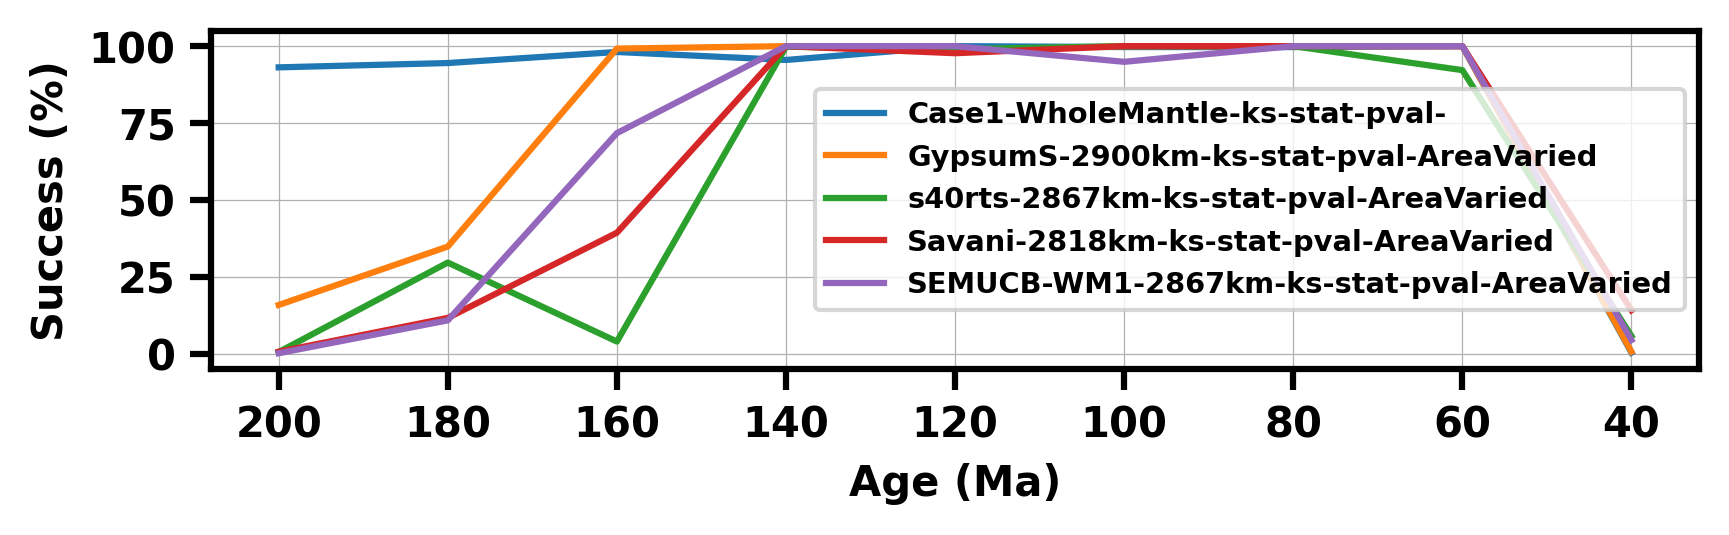

In [5]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1",]
Dpt=["WholeMantle"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]

#
PerfArray=[]
Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')

        
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["GypsumS/2900km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma_AreaVaried.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-AreaVaried')

#             


BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["s40rts/2867km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma_AreaVaried.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-AreaVaried')

#           Savani/2520km  
    
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["Savani/2818km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma_AreaVaried.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-AreaVaried')

# SEMUCB-WM1/2541km

BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["SEMUCB-WM1/2867km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma_AreaVaried.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-AreaVaried')


plt.legend(fontsize="x-small")
#     plt.show()
axes=plt.gca()
axes.set_aspect(0.3636)
plt.yticks([0,25,50,75,100])
plt.savefig("KS-Stats-Case1-Vs-Tomos-Deep-EqualArea.pdf")        
# plt.show()
        
        

In [19]:
tm="Savani"
Dpt=["2520km","2818km",]
Taki1="-MIN-DISTANCES_"
for d in Dpt[d]:
    print(d)

2520km
2818km


In [21]:
Dpt[0]

'2520km'

# Mantle FLow Models - Stats

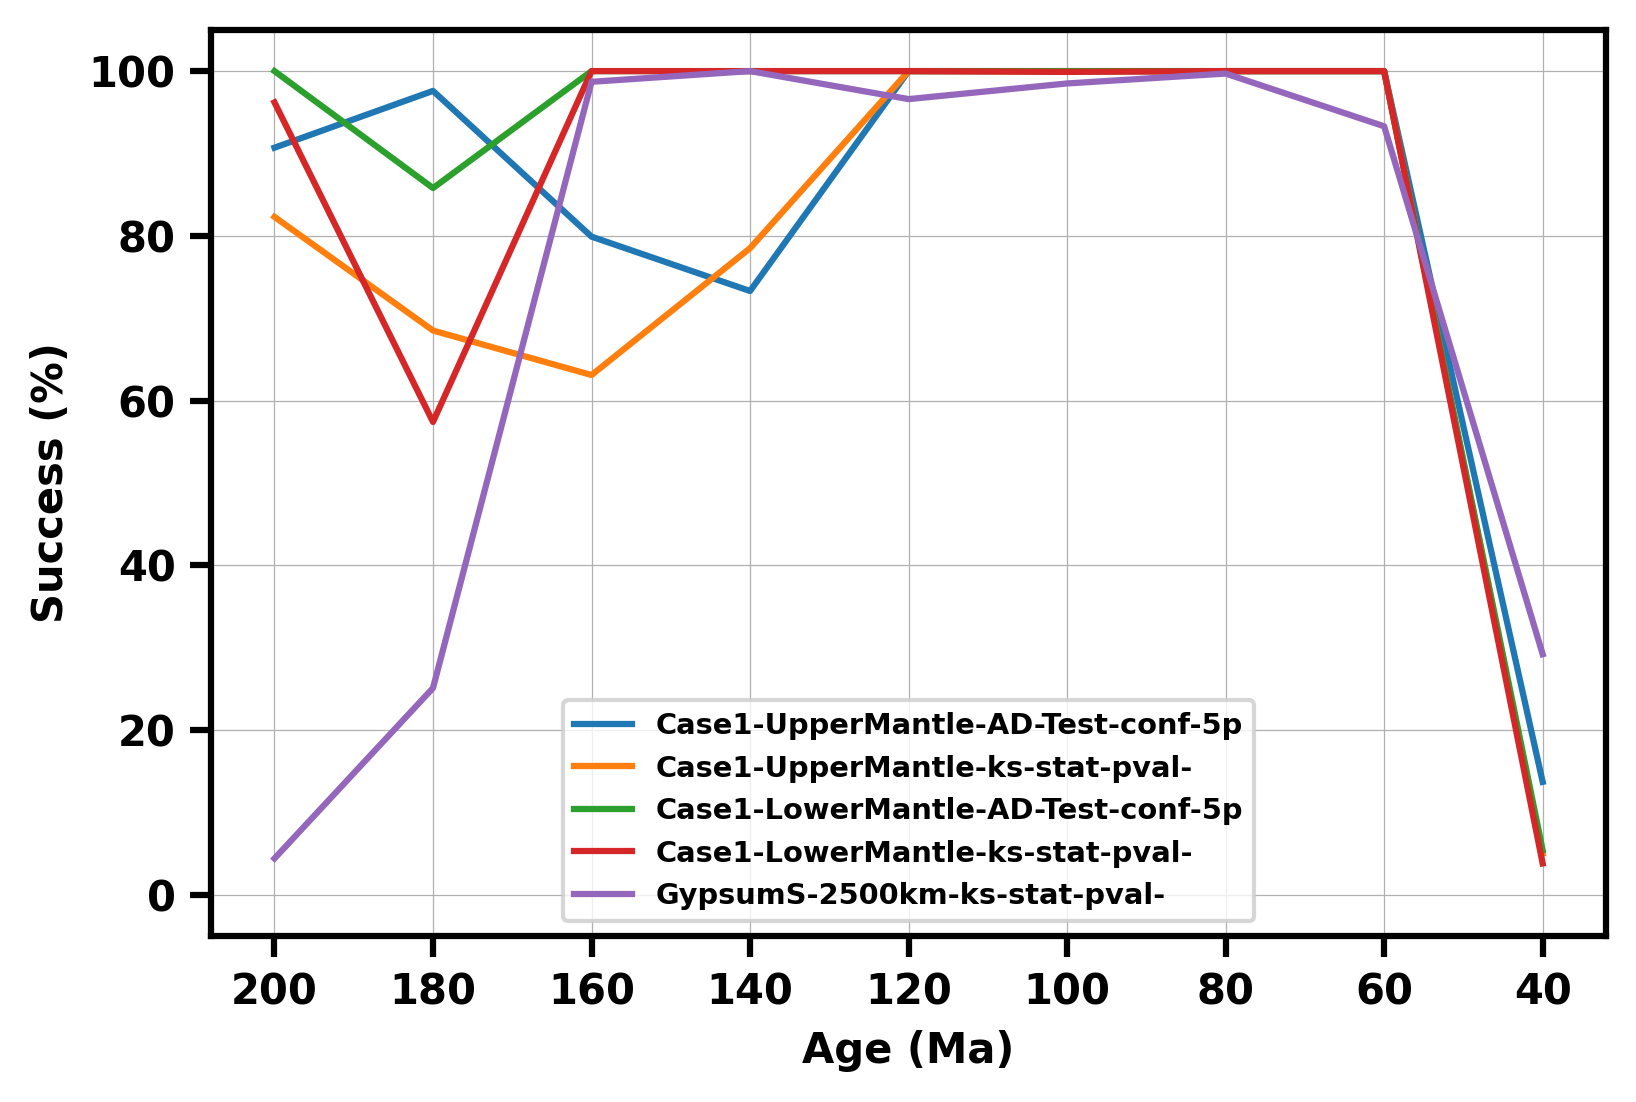

In [30]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1",]
Dpt=["UpperMantle","LowerMantle"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]

#

PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
#         PerfArray=[]
#         for Age in np.arange(200,endAge,-20):
#             Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#             PerfArray=np.append(PerfArray,Succes)
#         plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["GypsumS/2500km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
#     plt.close()
#     plt.gca().invert_xaxis()
# #         plt.gca().invert_yaxis()
#     plt.xlabel('Age (Ma)')
#     plt.ylabel('Success (%)')
#     plt.grid(linewidth=0.3)
#     plt.xticks(np.arange(200,endAge,-20))
#     plt.gca().figure.dpi=300
#     plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
#     print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#             
    
    
plt.legend(fontsize="x-small")
#     plt.show()
plt.savefig("KS-Stats-Case1-Vs-Tomos-Shallow.pdf")

# Tomographic Models Stats

/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-KS-Stat-critical-val200_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-KS-Stat-critical-val40_Ma.npy


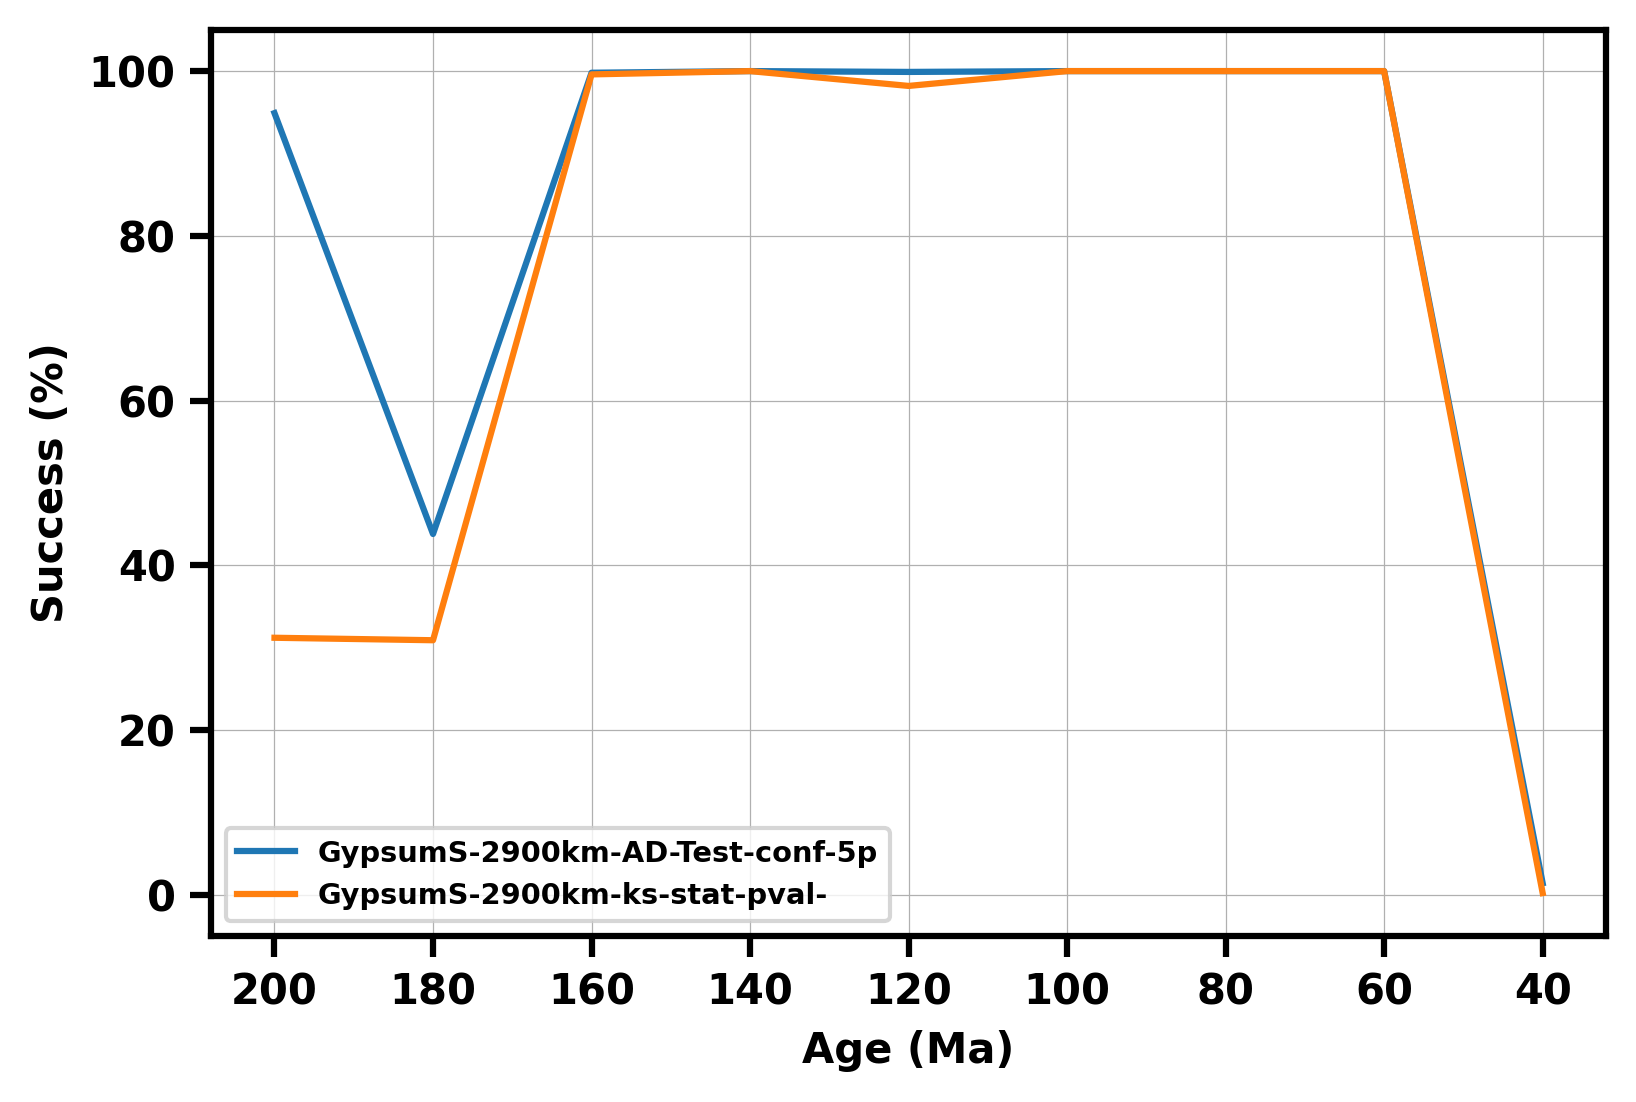

In [25]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
Cases=["GypsumS/2500km","GypsumS/2900km","s40rts/2514km","s40rts/2867km",
       "Savani/2520km","Savani/2818km","SEMUCB-WM1/2541km","SEMUCB-WM1/2867km"]
# Dpt=["WholeMantle","UpperMantle","LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases[0:2]:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
#     for d in Dpt:      
# #         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
    print(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#     STOP
#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-KS-Stat-critical-val')

#     PerfArray=[]
#     for Age in np.arange(200,endAge,-20):
#         Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
#         PerfArray=np.append(PerfArray,Succes)
#     plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-25p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-AD-Test-conf-5p')

    PerfArray=[]
    for Age in np.arange(200,endAge,-20):
        Succes=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
        PerfArray=np.append(PerfArray,Succes)
    plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs[:-7]+"-"+cs[-6:]+'-ks-stat-pval-')

#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    # plt.show()
    plt.savefig("Statistics-"+cs[:-7]+"-"+cs[-6:]+"All-tests.pdf")

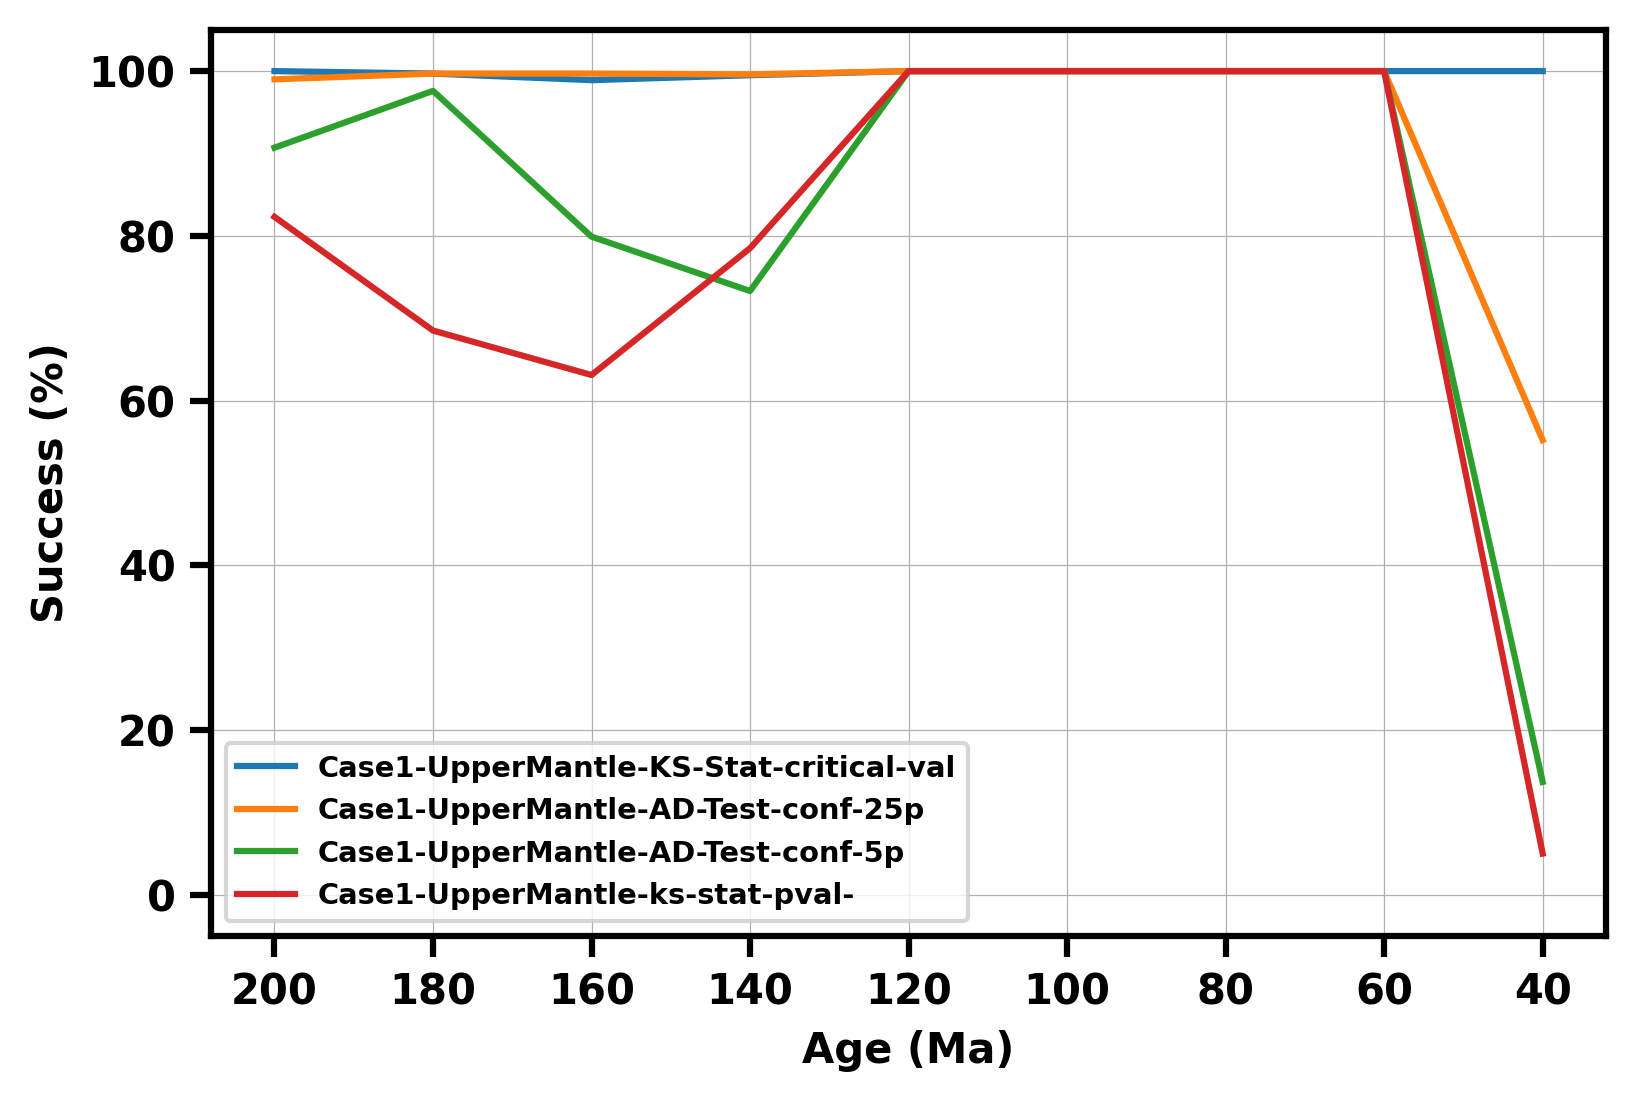

In [117]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1"]
Dpt=["UpperMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    plt.show()
#         plt.savefig("Statistics-"+tm+d+"-ADTest.pdf")

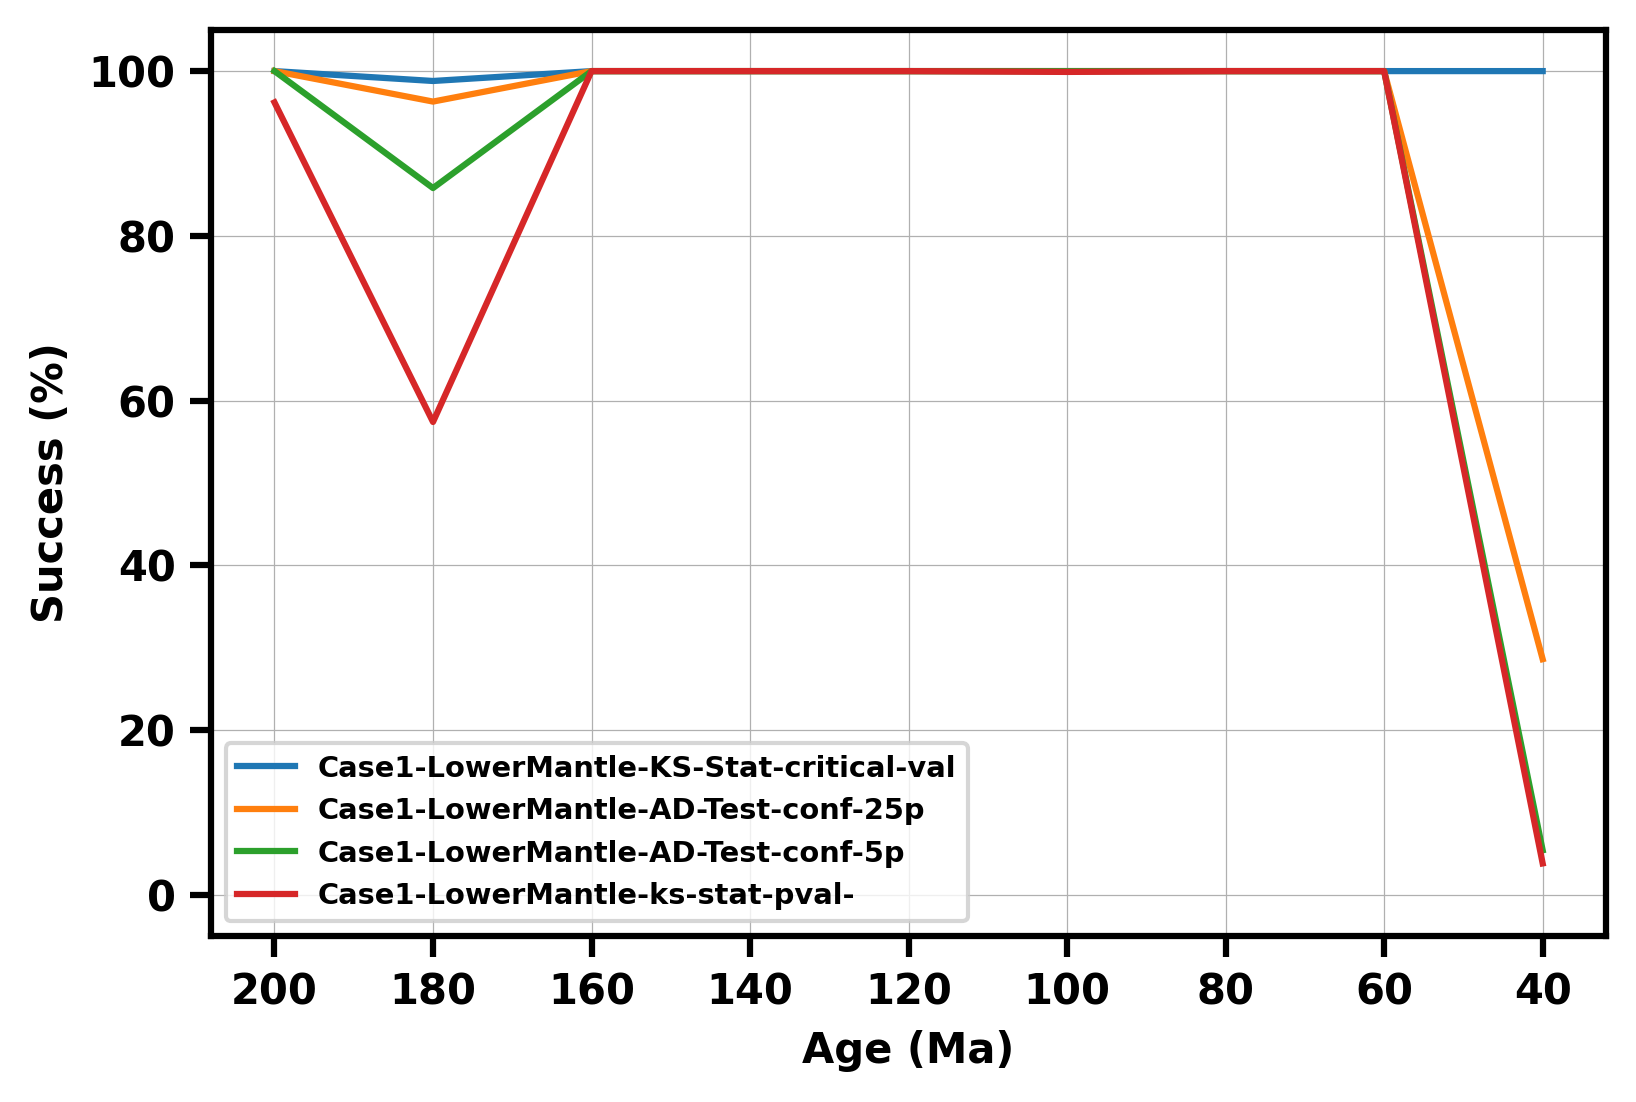

In [118]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case1"]
Dpt=["LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    plt.show()
#         plt.savefig("Statistics-"+tm+d+"-ADTest.pdf")

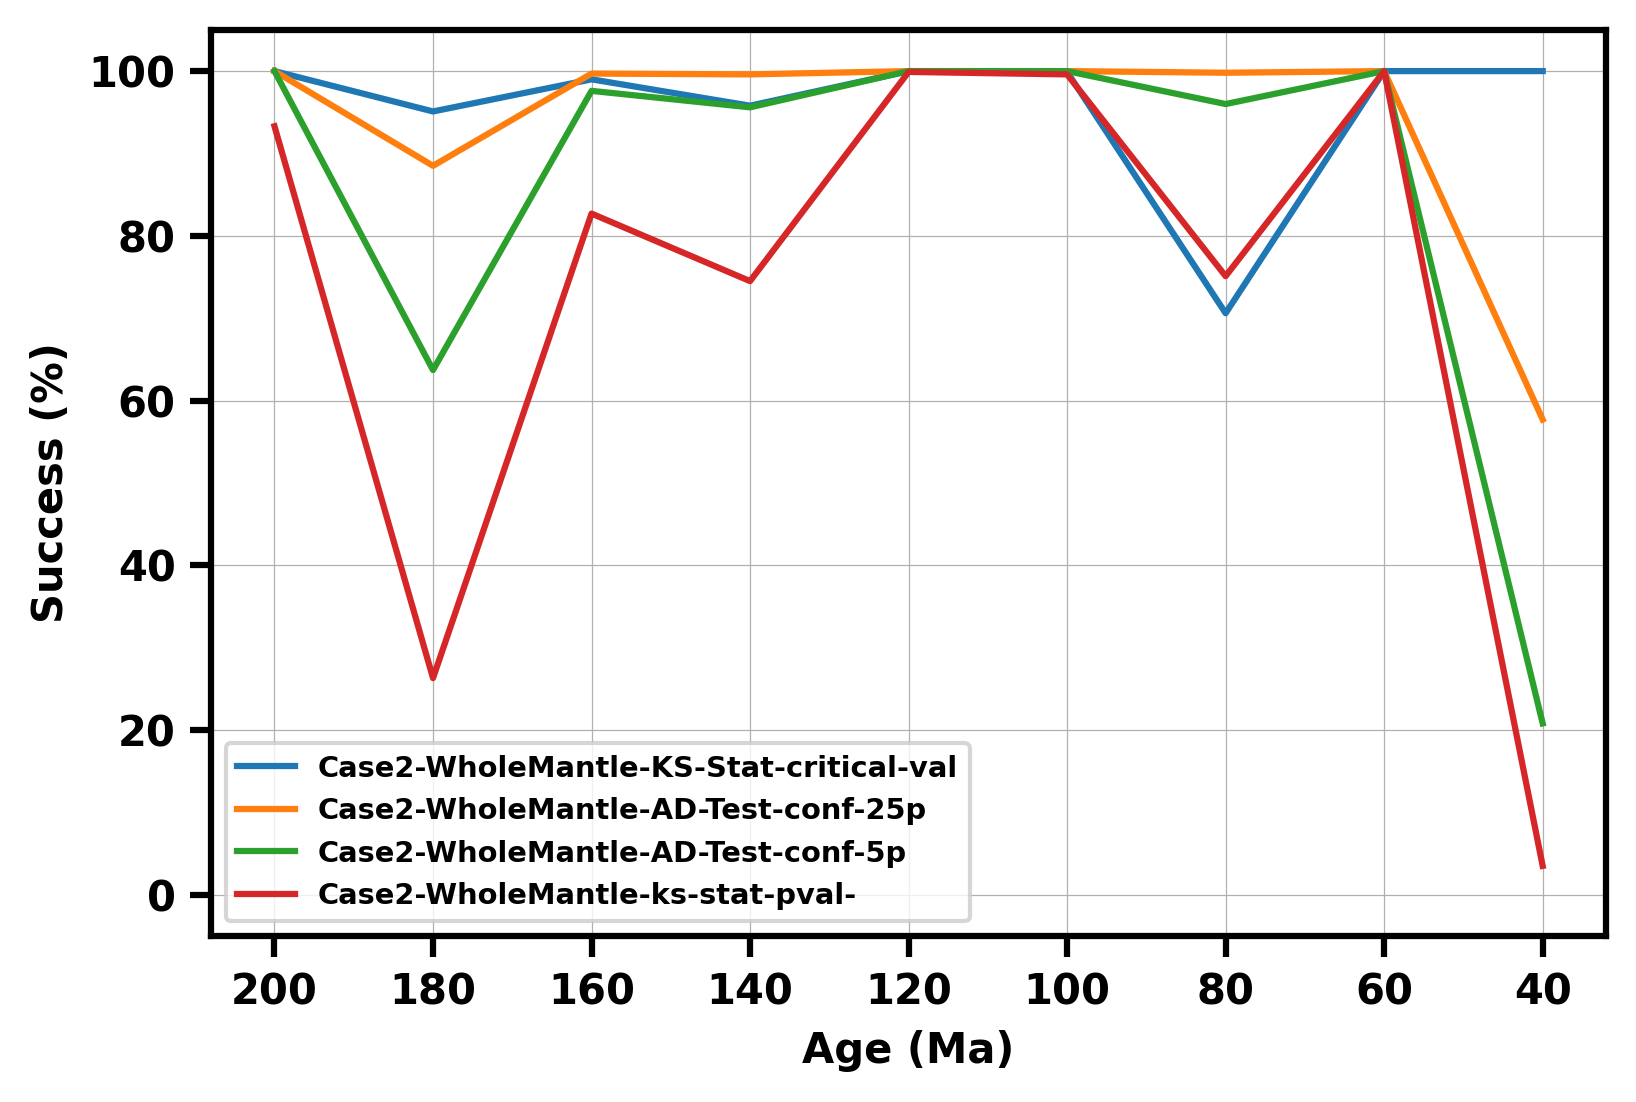

In [119]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case2"]
Dpt=["WholeMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    plt.show()
#         plt.savefig("Statistics-"+tm+d+"-ADTest.pdf")

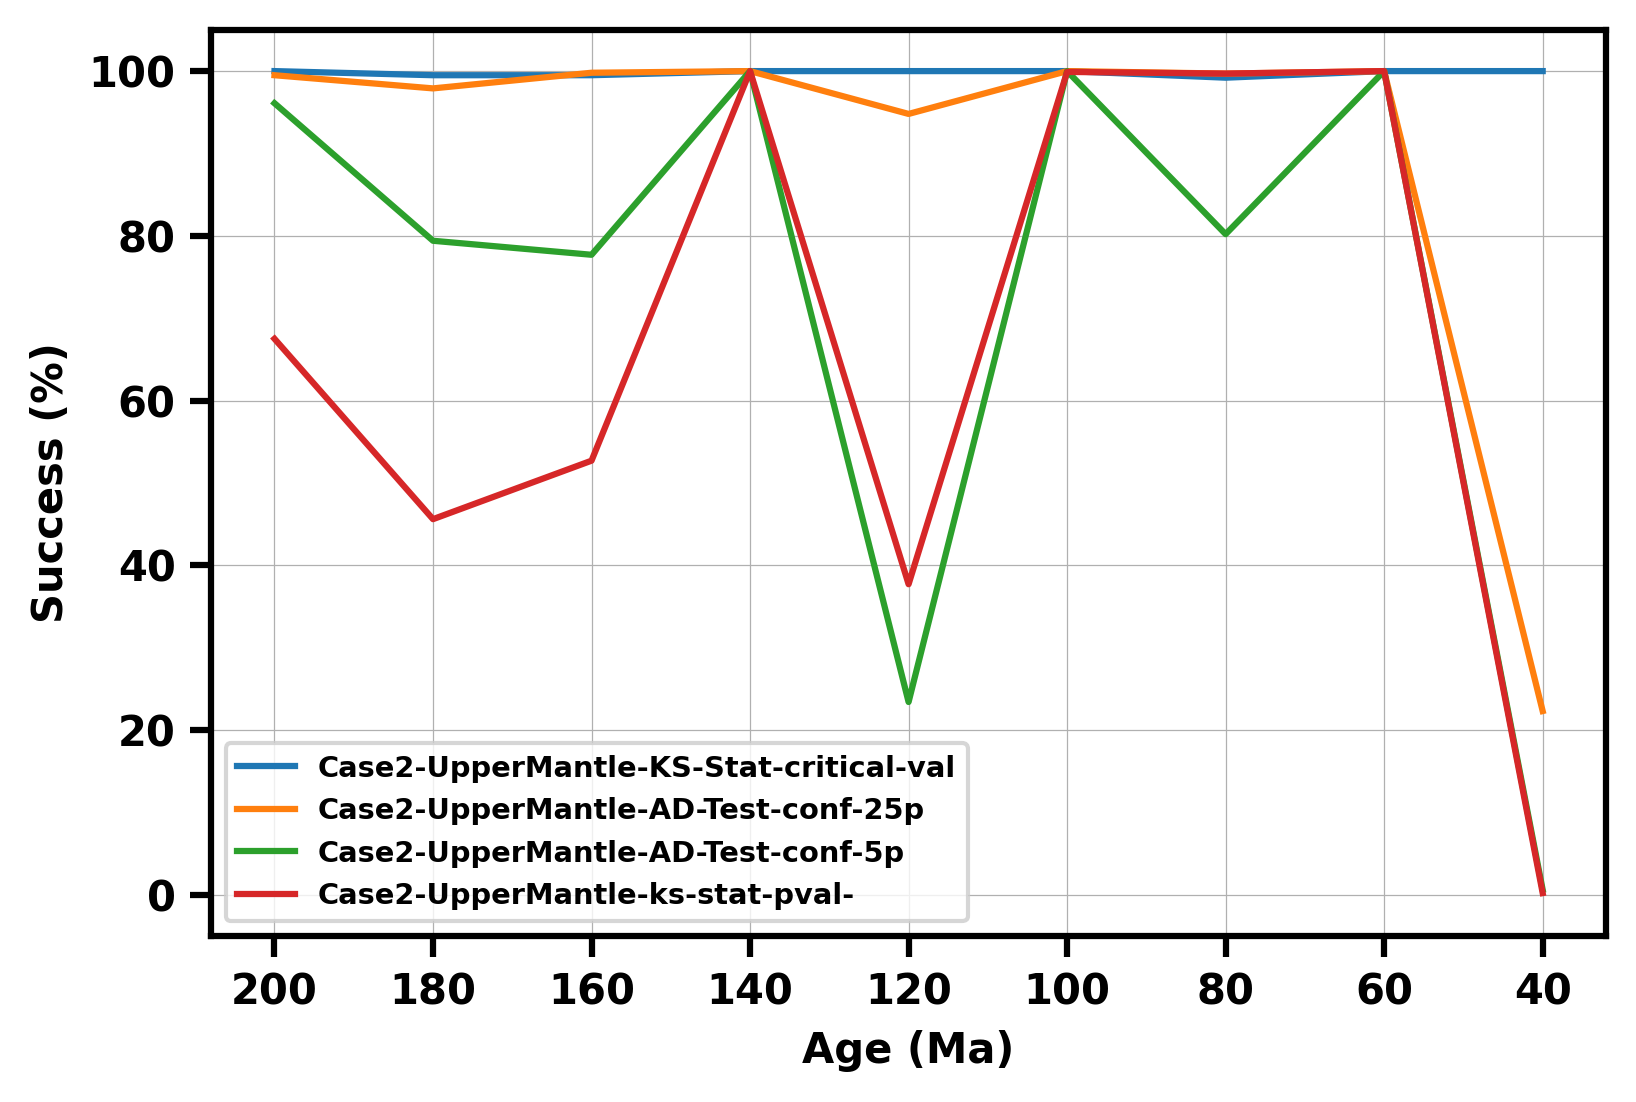

In [121]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case2"]
Dpt=["UpperMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    plt.show()
#         plt.savefig("Statistics-"+tm+d+"-ADTest.pdf")

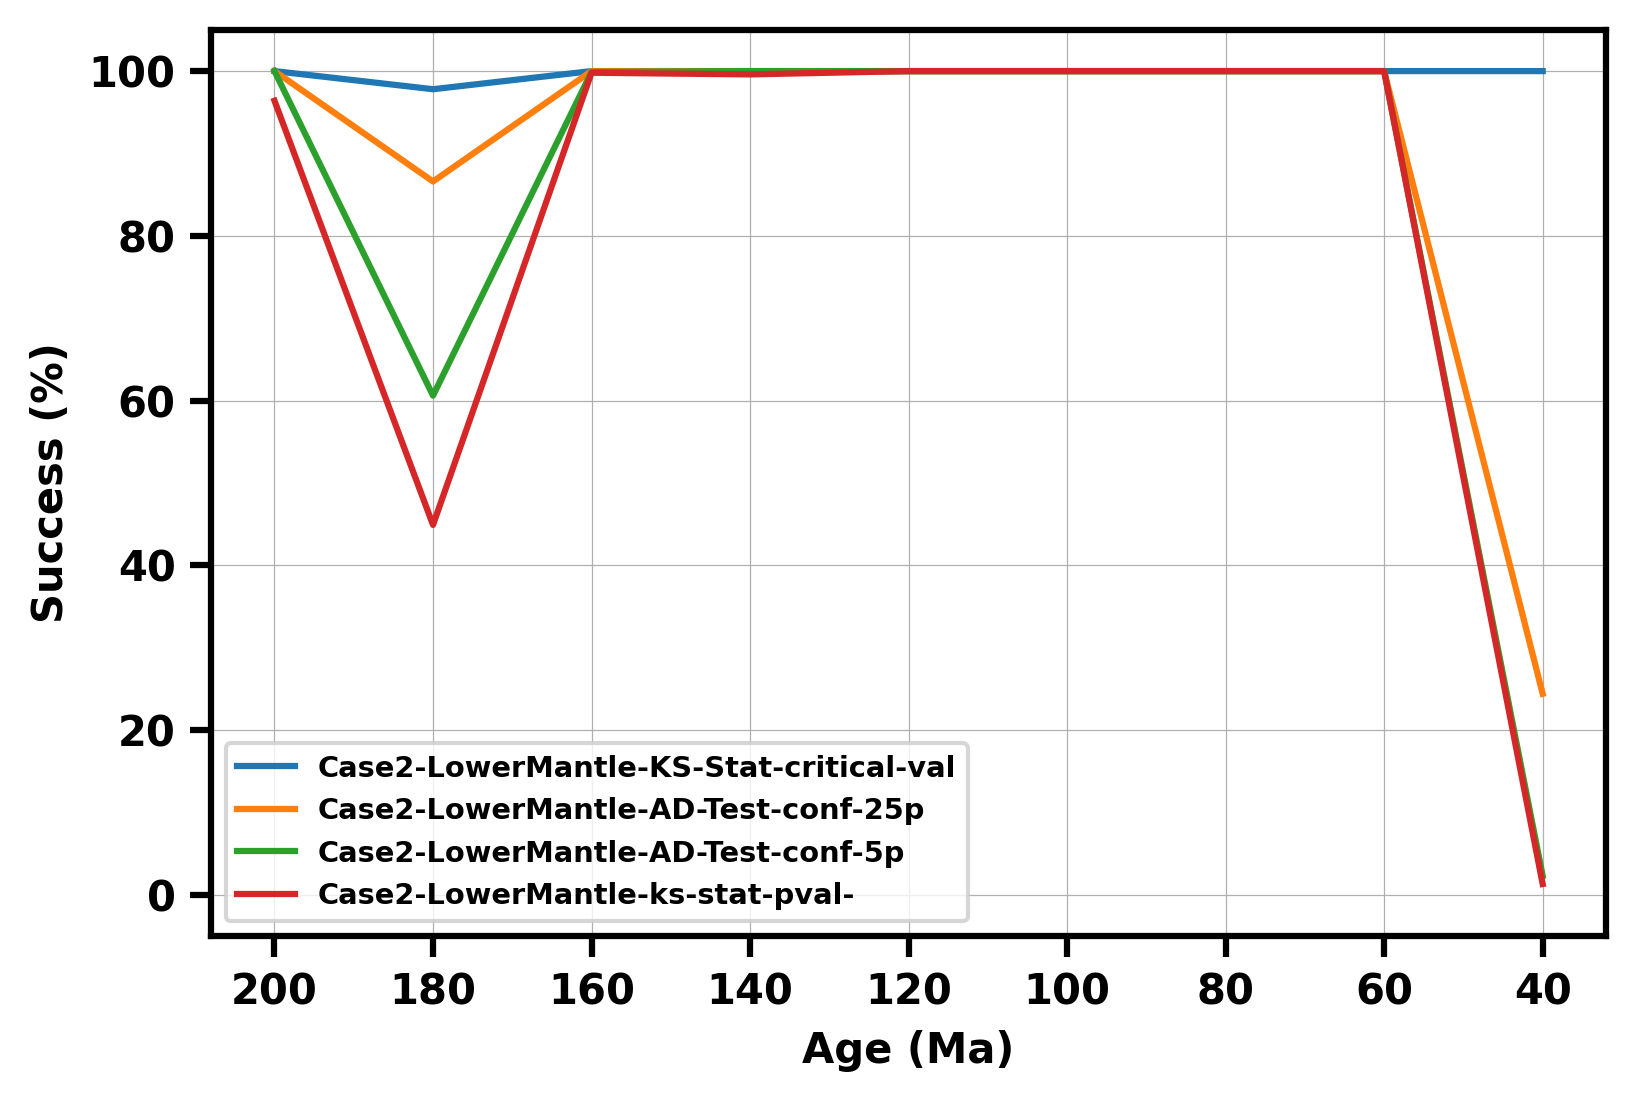

In [123]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"
Cases=["Case2"]
Dpt=["LowerMantle"]


PerfArray=[]

Age=200
endAge=20
for cs in Cases:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300
    plt.ylim(-5,105)
    for d in Dpt:      
#         print(d)
#         if os.path.exists(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")==True:
            
#             print(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-fadd-"+str(Age)+"_Ma.npy")
            
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-KS-Stat-critical-val"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-KS-Stat-critical-val')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-25p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-25p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-AD-Test-conf-5p-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-AD-Test-conf-5p')
        
        PerfArray=[]
        for Age in np.arange(200,endAge,-20):
            Succes=np.load(BaseD+cs+"/Saved-Arrays/"+cs+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=np.append(PerfArray,Succes)
        plt.plot(np.arange(200,endAge,-20),100*PerfArray,label=cs+"-"+d+'-ks-stat-pval-')
        
#         
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#     else:
#         continue
    
#         for d in Dpt:       
#         if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
#             print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
    
    
    
    
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
#         else:
#             continue 
#         plt.ylim(0,25)-Conditioned -ks-stat-pval-
        # plt.ylim(-5,105)
    plt.legend(fontsize="x-small")
    plt.show()
#         plt.savefig("Statistics-"+tm+d+"-ADTest.pdf")

# KS- Stats - Tomographic Models

/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis-KS/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-ks-stat-two-sided-200_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis-KS/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-ks-stat-two-sided-New-40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis-KS/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-Conditioned40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-Conditioned40_Ma.npy
/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-ks-stat-pval-40_Ma.npy


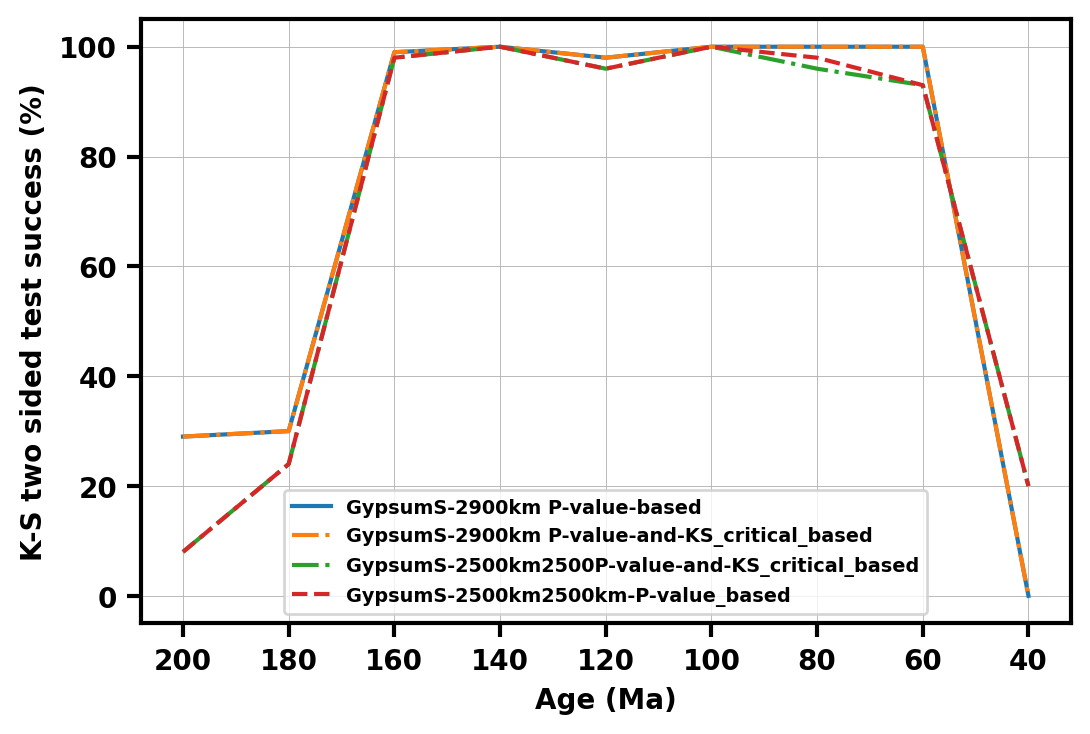

In [109]:
BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis-KS/Tomographic-Model-Stats/"
# Tomog=["SEMUCB-WM1","GypsumS","Savani","s40rts"]
Tomog=["GypsumS"]

# Dpt=["2541km","2867km","2500km","2900km","2520km","2818km","2514km","2867km"]

Dpt=["2900km"]


PerfArray=[]

Age=200

for tm in Tomog:
    plt.close()
    plt.gca().invert_xaxis()
#         plt.gca().invert_yaxis()
    plt.xlabel('Age (Ma)')
    plt.ylabel('K-S two sided test success (%)')
    plt.grid(linewidth=0.3)
    plt.xticks(np.arange(200,20,-20))
    plt.gca().figure.dpi=200
    plt.ylim(-5,105)
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-"+str(Age)+"_Ma.npy")
            PerfArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Success=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,float(Success))
#                 print(Success)

#             plt.plot(np.arange(200,20,-20),100.0*PerfArray,label=tm+"-"+d+" OLD")
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue

    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-New-"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-New-"+str(Age)+"_Ma.npy")
            PerfArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Success=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,float(Success))
#                 print(Success)

            plt.plot(np.arange(200,20,-20),100.0*PerfArray,label=tm+"-"+d+" P-value-based")
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue 
            
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
            PerfArray=[]
#                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Success=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,float(Success))
#                 print(Success)

            plt.plot(np.arange(200,20,-20),100.0*PerfArray,label=tm+"-"+d+" P-value-and-KS_critical_based",
                    linestyle="-.")
#             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue 
      #      
    BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
    Dpt=["2500km"]
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
            PerfArray=[]
    #                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Success=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,float(Success))
    #                 print(Success)

            plt.plot(np.arange(200,20,-20),100.0*PerfArray,label=tm+"-"+d+"2500P-value-and-KS_critical_based",
                    linestyle="-.")
    #             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue    
            
    BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
    Dpt=["2500km"]
    for d in Dpt:       
        if os.path.exists(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")==True:
            print(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
            PerfArray=[]
    #                 Ex=np.append(Ex,BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+Taki1+str(Age)+"_Ma.txt")
            for Age in np.arange(200,20,-20):
                Success=np.load(BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-pval-"+str(Age)+"_Ma.npy")
                PerfArray=np.append(PerfArray,float(Success))
    #                 print(Success)

            plt.plot(np.arange(200,20,-20),100.0*PerfArray,label=tm+"-"+d+"2500km-P-value_based",
                    linestyle="--")
    #             plt.errorbar(np.arange(200,20,-20),meanArray, yerr=stdArray,lolims=True,label=tm+"-"+d)
        else:
            continue            
    #         plt.ylim(0,25)
        # plt.ylim(-5,105)
plt.legend(fontsize="x-small")
plt.show()
    #         plt.savefig("Statistics-"+tm+"-ks-stat-two-sidedNEW.pdf")

In [94]:
BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-Conditioned"+str(Age)+"_Ma.npy"

'/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2500km-Conditioned40_Ma.npy'

In [17]:
BaseD+tm+"/Saved-Arrays/"+tm+"-"+d+"-ks-stat-two-sided-"+str(Age)+"_Ma.npy"

'/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis-KS/Tomographic-Model-Stats/GypsumS/Saved-Arrays/GypsumS-2900km-ks-stat-two-sided-200_Ma.npy'

# Amazing Plot 2-D

In [259]:

for Age1 in np.arange(200,20,-20):
    
    Age2=Age1-20


    BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Tomographic-Model-Stats/"
    Cases=["GypsumS/2900km","s40rts/2514km","s40rts/2867km",
           "Savani/2520km","Savani/2818km","SEMUCB-WM1/2541km","SEMUCB-WM1/2867km"]

    # Dpt=["WholeMantle","UpperMantle","LowerMantle"]
#     plt.close()
    PerfArray=[]

    Taki1="-MIN-DISTANCES_"
    color=['k','b','b','r','r','g','g']
#     print(Age1,Age2)
    # Age=200
    # endAge=20

    count=0
    for cs in Cases:
        for Age in np.arange(Age1,Age2,-20):

            PerfArray=[]

            Success=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age1)+"_Ma.npy")

            df = pd.read_csv(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+Taki1+str(Age1)+"_Ma.txt",
                                         skiprows=0,header=None,sep=',')
        #     stdArray=np.append(stdArray,df.std()[0])
            MeanMinDist=df.mean()[0]
    #         print(MeanMinDist,100*Success)
    # 
#             plt.scatter(MeanMinDist,100*Success,marker="s",facecolors='none',edgecolors=color[count])
            
#             plt.errorbar(MeanMinDist,100*Success,xerr=[[0],[STD]], ecolor=color[count],
#                         elinewidth=0.5, markeredgewidth=0)

            Success=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-ks-stat-pval-"+str(Age1)+"_Ma.npy")

            plt.scatter(MeanMinDist,100*Success,marker="s",facecolors='none',edgecolors=color[count])
            
            STD=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-MIN-DISTANCES-STD_"+str(Age1)+"_Ma.npy")

            plt.errorbar(MeanMinDist,100*Success,xerr=[[0],[STD]], ecolor=color[count],
                        elinewidth=0.5, markeredgewidth=0)

            

#             Success=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-KS-Stat-critical-val"+str(Age1)+"_Ma.npy")

#             plt.scatter(MeanMinDist,100*Success,marker="s",facecolors='none',edgecolors=color[count])

#             Success=np.load(BaseD+cs[:-7]+"/Saved-Arrays/"+cs[:-7]+"-"+cs[-6:]+"-AD-Test-conf-25p-"+str(Age1)+"_Ma.npy")

#             plt.scatter(MeanMinDist,100*Success,marker="s",facecolors='none',edgecolors=color[count])



        count=count+1

    # MANTLE FLOW CASES

    BaseD="/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/"

    Cases=["Case1/UpperMantle","Case1/LowerMantle","Case1/WholeMantle",
           "Case2/UpperMantle","Case2/LowerMantle","Case2/WholeMantle",
           "Case3/UpperMantle","Case3/LowerMantle","Case3/WholeMantle"]

    # Cases=["Case1/UpperMantle","Case1/LowerMantle","Case1/WholeMantle"]

    # Dpt=["WholeMantle","UpperMantle","LowerMantle"]

    PerfArray=[]

    Taki1="-MIN-DISTANCES_"
    # color=['k','k','k','b','b','b','r','r','r','g','g','g']
    color=['orange','red','black','orange','red','black','orange','red','black']

    # plt.close()
    # Age=200
    # endAge=20
    count=0
    for cs in Cases:
        if(cs[:-12]=="Case1"):
            sizeN=190
        elif (cs[:-12]=="Case2"):
            sizeN=70
        else:
            sizeN=40

        for Age in np.arange(Age1,Age2,-20):
    #         print(sizeN)
            Success=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-AD-Test-conf-5p-"+str(Age1)+"_Ma.npy")

            df = pd.read_csv(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+Taki1+str(Age1)+"_Ma.txt",
                                         skiprows=0,header=None,sep=',')
            
        #     stdArray=np.append(stdArray,df.std()[0])
            MeanMinDist=df.mean()[0]
    #         print(MeanMinDist,100*Success)
    # 
    #         plt.scatter(MeanMinDist,100*Success,facecolors='none',edgecolors=color[count],
    #                     marker="o",s=sizeN,linewidths=0.5)

#             STD=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-MIN-DISTANCES-STD_"+str(Age1)+"_Ma.npy")


    #         plt.errorbar(MeanMinDist,100*Success,xerr=STD,ecolor=color[count])

            Success=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-ks-stat-pval-"+str(Age1)+"_Ma.npy")

            plt.scatter(MeanMinDist,100*Success,facecolors='none',edgecolors=color[count],
                        marker="o",s=sizeN,linewidths=0.5)

            STD=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-MIN-DISTANCES-STD_"+str(Age1)+"_Ma.npy")

            plt.errorbar(MeanMinDist,100*Success,xerr=[[0],[STD]], ecolor=color[count],
                        elinewidth=0.5, markeredgewidth=0)
            
#             Success=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-KS-Stat-critical-val"+str(Age1)+"_Ma.npy")

#             plt.scatter(MeanMinDist,100*Success,facecolors='none',edgecolors=color[count],
#                         marker="o",s=sizeN,linewidths=0.5)

#             Success=np.load(BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-AD-Test-conf-5p-"+str(Age1)+"_Ma.npy")

#             plt.scatter(MeanMinDist,100*Success,facecolors='none',edgecolors=color[count],
#                         marker="o",s=sizeN,linewidths=0.5)

#             plt.errorbar(MeanMinDist,100*Success,xerr=[[0],[STD]], ecolor=color[count],
#                          elinewidth=0.5, markeredgewidth=0)



            

        count=count+1

#     plt.plot(np.arange(0.05,15,0.01),50*np.ones(len(np.arange(0.05,15,0.01))),linewidth=1,linestyle="--")    
    plt.xlim(-0.5,14)
#     plt.xscale('log')
#     plt.yscale('log')
    # plt.yscale('log')
    # plt.xscale('log')
    # plt.loglog(nonpositivex='clip', nonpositivey='clip')
    # plt.gca().invert_xaxis()
    # plt.gca().invert_yaxis()
    plt.xlabel('Mean Min. Distance ($\degree$)')
    plt.ylabel('Success (%)')
    plt.grid(linewidth=0.3)
    # plt.xticks(np.arange(200,endAge,-20))
    plt.gca().figure.dpi=300

    plt.ylim(-5,110)
    # plt.legend(fontsize="x-small")
    # plt.show()
    
    plt.savefig("AmazingPlot"+str(Age1)+"_Ma-OnlyKS.pdf")
    plt.close()
# plt.savefig("AmazingPlot_between_200_Ma_20_Ma.pdf")


#     plt.close()




In [244]:
# np.stack([STD,ErLow])
STD,ErLow

(array(0.64983807), array([0.]))

In [58]:
BaseD+cs[:-11]+"/Saved-Arrays/"+cs[:-11]+"-"+cs[-6:]+"-AD-Test-conf-5p-"+str(Age)

'/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/Case1//Saved-Arrays/Case1/-Mantle-AD-Test-conf-5p-200'

In [68]:
BaseD+cs[:-11]+"Saved-Arrays/"+cs[:-12]+"-"+cs[-11:]+"-AD-Test-conf-5p-"

'/Users/omer/Desktop/NatGeoReviews/Statistical-Analysis/Flow-Model-Stats/Case1/Saved-Arrays/Case1-UpperMantle-AD-Test-conf-5p-'

In [65]:
cs[-11:]

'UpperMantle'